# Lab 5 - Linear oscillations and forces (routine)

### Solutions


In [1]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy.integrate import odeint

ModuleNotFoundError: No module named 'scipy'

### Assignment Overview:


In this week's lab, you will use ode solutions to investigate linear oscillator models. In part 1, you will see models of a simple harmonic oscillator and in part 2, you will add damping and analyze the resulting dynamics. You will need to modify and use the code given to you in lab 4 to solve the second-order ODEs. 

**Part 1: Harmonic oscillator**

We saw in class that we can write the 2nd order harmonic oscillator ODE 

$$m \ddot x  = -k x $$

as two 1st order ODEs (setting mass to 1):

$$ dy/dt = -k x $$
$$ dx/dt = y $$

Take the code for definingn and solving ODE from part 2 of lab 4 and modify it to represent the harmonic oscillator ODE above (remember to change all the parameters to match the ones used in this ODE.)  Use the code from lab 4 as a template to do these tasks with the following parameters: 

 - Calulate the eigenvalues of the defining matrix of the 2-variable ODE, and classify the dynamics of the solutions 
 - Make a phase plane plot for a harmonic oscillator and plot four solution rajectories, starting at different initial values (use a for loop, like you did in lab 4)
 - Plot the solutions for displacement and velocity as a function of time and report the period of oscillations.
 
**Important hint:** If your ODE function has only one parameter, e.g. k; in order for the args input to work in the odeint function call, you need to turn it into a tuple, e.g. args = (k,)

**Q1.1:** set $k = \pi^2$

[0.+3.14159265j 0.-3.14159265j]


/Users/dkon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


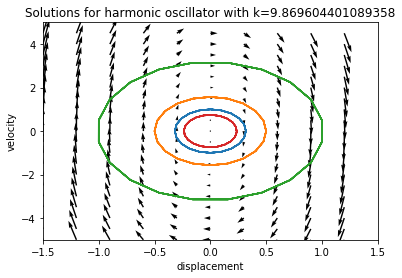

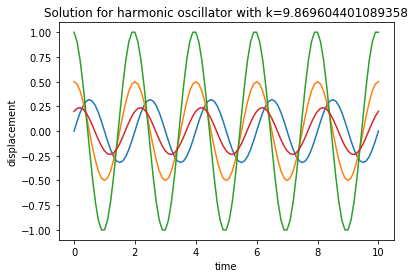

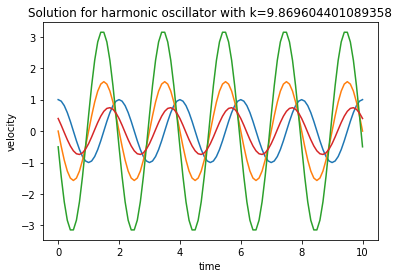

In [3]:
# define the ODE function
def fun(xy, t, k):
    newxy = [xy[1], -k*xy[0]]
    return newxy

# Set parameter values
k = np.pi**2

# 1. Calculate the eigenvalues of the ODE:

Matrix = np.array([[0, 1],[-k, 0] ])
evals, evecs = np.linalg.eig(Matrix)
print(evals)

# 2. Make phase plane plot
xmin = -1.5 #change the parameters here to control the range of the axes
xmax = 1.5
ymin = -5
ymax = 5
dx = 0.3 #set the size of the x-step on the grid
dy = 0.5 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x, y = np.meshgrid(X, Y);  #create a grid

dx = y
dy = -k*x

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dx, dy)
plt.xlim(xmin,xmax)
plt.ylim(ymin, ymax)
plt.xlabel('displacement') #use more informative labels for a real model
plt.ylabel('velocity')
plt.title('Solutions for harmonic oscillator with k='+str(k))

# Set up arrays of initial values
Xinit = [0, 0.5, 1, 0.2]
Yinit = [1, 0, -0.5,0.4]

# Set time vector
Tmax = 10
dt = 0.1
numsteps = Tmax/dt + 1
t = np.linspace(0, Tmax, numsteps) # create time vector

for j in range(4):
    # Set different initial values, the vector of times, and call the ODE solver again
    init = [Xinit[j], Yinit[j]] #[intial x, initial y]
    sol = odeint(fun, init, t, args = (k,)) # calculate numeric solution of ODE defined in fun

    # Plot the solution...
    plt.figure(1)
    plt.plot(sol[:,0], sol[:,1])    
    
    plt.figure(2)
    plt.plot(t, sol[:,0])

    plt.figure(3)
    plt.plot(t, sol[:,1])

    
plt.figure(2)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('Solution for harmonic oscillator with k='+str(k))


plt.figure(3)
plt.xlabel('time')
plt.ylabel('velocity')
plt.title('Solution for harmonic oscillator with k='+str(k))
plt.show()

1. The eigevalues are purely imaginary (+/- pi) thus the solutions will be oscillations with a constant amplitude.
2. The phase portrait confirms this prediction.
3. The period of all four trajectories is 2, regardless of initial conditions.

**Q1.2:** set $k = 4*\pi^2$

[0.+6.28318531j 0.-6.28318531j]


/Users/dkon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


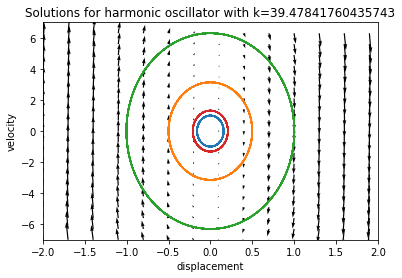

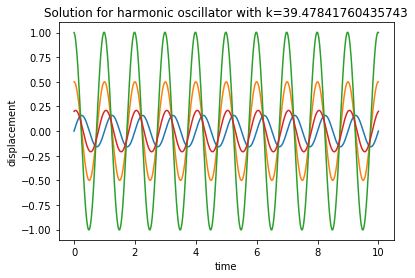

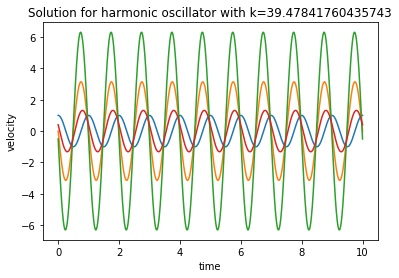

In [4]:
# Set parameter values
k = 4*np.pi**2

# 1. Calculate the eigenvalues of the ODE:

Matrix = np.array([[0, 1],[-k, 0] ])
evals, evecs = np.linalg.eig(Matrix)
print(evals)

# 2. Make phase plane plot
xmin = -2 #change the parameters here to control the range of the axes
xmax = 2
ymin = -7
ymax = 7
dx = 0.3 #set the size of the x-step on the grid
dy = 0.7 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x, y = np.meshgrid(X, Y);  #create a grid

dx = y
dy = -k*x

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dx, dy)
plt.xlim(xmin,xmax)
plt.ylim(ymin, ymax)
plt.xlabel('displacement') #use more informative labels for a real model
plt.ylabel('velocity')
plt.title('Solutions for harmonic oscillator with k='+str(k))

# Set up arrays of initial values
Xinit = [0, 0.5, 1, 0.2]
Yinit = [1, 0, -0.5,0.4]

# Set time vector
Tmax = 10
dt = 0.01
numsteps = Tmax/dt + 1
t = np.linspace(0, Tmax, numsteps) # create time vector

for j in range(4):
    # Set different initial values, the vector of times, and call the ODE solver again
    init = [Xinit[j], Yinit[j]] #[intial x, initial y]
    sol = odeint(fun, init, t, args=(k,)) # calculate numeric solution of ODE defined in fun

    # Plot the solution...
    plt.figure(1)
    plt.plot(sol[:,0], sol[:,1])    
    
    plt.figure(2)
    plt.plot(t, sol[:,0])

    plt.figure(3)
    plt.plot(t, sol[:,1])

    
plt.figure(2)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('Solution for harmonic oscillator with k='+str(k))


plt.figure(3)
plt.xlabel('time')
plt.ylabel('velocity')
plt.title('Solution for harmonic oscillator with k='+str(k))
plt.show()

1. The eigevalues are purely imaginary (+/- 2*pi) thus the solutions will be oscillations with a constant amplitude.
2. The phase portrait confirms this prediction.
3. The period of all four trajectories is 1, regardless of initial conditions.

**Q1.3:** set $k = 0.25*\pi^2$

[0.+6.28318531j 0.-6.28318531j]


/Users/dkon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


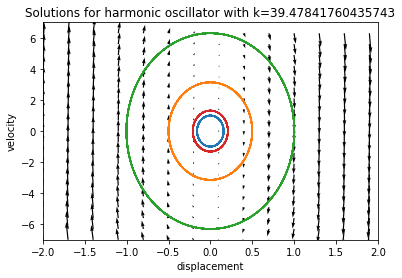

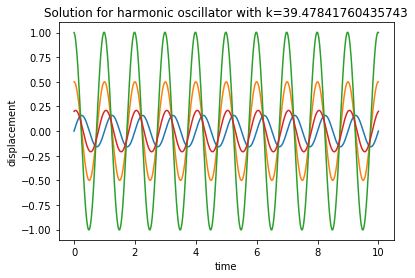

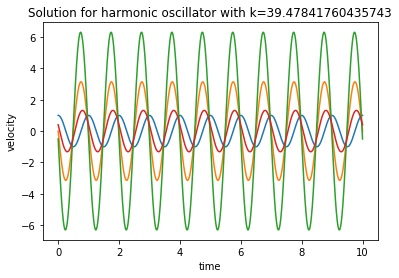

In [5]:
# Set parameter values
k = 4*np.pi**2

# 1. Calculate the eigenvalues of the ODE:

Matrix = np.array([[0, 1],[-k, 0] ])
evals, evecs = np.linalg.eig(Matrix)
print(evals)

# 2. Make phase plane plot
xmin = -2 #change the parameters here to control the range of the axes
xmax = 2
ymin = -7
ymax = 7
dx = 0.3 #set the size of the x-step on the grid
dy = 0.7 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x, y = np.meshgrid(X, Y);  #create a grid

dx = y
dy = -k*x

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dx, dy)
plt.xlim(xmin,xmax)
plt.ylim(ymin, ymax)
plt.xlabel('displacement') #use more informative labels for a real model
plt.ylabel('velocity')
plt.title('Solutions for harmonic oscillator with k='+str(k))

# Set up arrays of initial values
Xinit = [0, 0.5, 1, 0.2]
Yinit = [1, 0, -0.5,0.4]

# Set time vector
Tmax = 10
dt = 0.01
numsteps = Tmax/dt + 1
t = np.linspace(0, Tmax, numsteps) # create time vector

for j in range(4):
    # Set different initial values, the vector of times, and call the ODE solver again
    init = [Xinit[j], Yinit[j]] #[intial x, initial y]
    sol = odeint(fun, init, t, args=(k,)) # calculate numeric solution of ODE defined in fun

    # Plot the solution...
    plt.figure(1)
    plt.plot(sol[:,0], sol[:,1])    
    
    plt.figure(2)
    plt.plot(t, sol[:,0])

    plt.figure(3)
    plt.plot(t, sol[:,1])

    
plt.figure(2)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('Solution for harmonic oscillator with k='+str(k))


plt.figure(3)
plt.xlabel('time')
plt.ylabel('velocity')
plt.title('Solution for harmonic oscillator with k='+str(k))
plt.show()

1. The eigevalues are purely imaginary (+/- 0.5*pi) thus the solutions will be oscillations with a constant amplitude.
2. The phase portrait confirms this prediction.
3. The period of all four trajectories is 4, regardless of initial conditions.

**Q1.4:** Based on your observations, determine the value of k that would produce oscillations with period 5. Repeat the same calculations performed above and confirm the period by the plots of the solutions over time.

[0.+1.25663706j 0.-1.25663706j]


/Users/dkon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


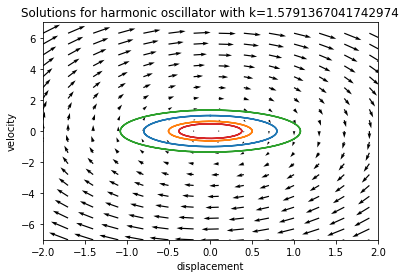

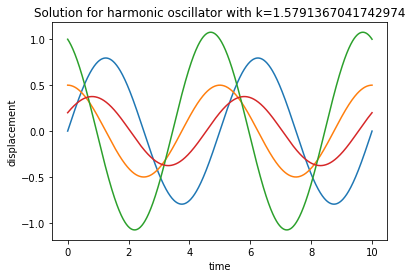

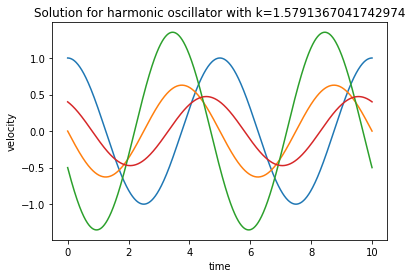

In [6]:
# Set parameter values
k = 4/25*np.pi**2

# 1. Calculate the eigenvalues of the ODE:

Matrix = np.array([[0, 1],[-k, 0] ])
evals, evecs = np.linalg.eig(Matrix)
print(evals)

# 2. Make phase plane plot
xmin = -2 #change the parameters here to control the range of the axes
xmax = 2
ymin = -7
ymax = 7
dx = 0.3 #set the size of the x-step on the grid
dy = 0.7 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x, y = np.meshgrid(X, Y);  #create a grid

dx = y
dy = -k*x

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dx, dy)
plt.xlim(xmin,xmax)
plt.ylim(ymin, ymax)
plt.xlabel('displacement') #use more informative labels for a real model
plt.ylabel('velocity')
plt.title('Solutions for harmonic oscillator with k='+str(k))

# Set up arrays of initial values
Xinit = [0, 0.5, 1, 0.2]
Yinit = [1, 0, -0.5,0.4]

# Set time vector
Tmax = 10
dt = 0.01
numsteps = Tmax/dt + 1
t = np.linspace(0, Tmax, numsteps) # create time vector

for j in range(4):
    # Set different initial values, the vector of times, and call the ODE solver again
    init = [Xinit[j], Yinit[j]] #[intial x, initial y]
    sol = odeint(fun, init, t, args=(k,)) # calculate numeric solution of ODE defined in fun

    # Plot the solution...
    plt.figure(1)
    plt.plot(sol[:,0], sol[:,1])    
    
    plt.figure(2)
    plt.plot(t, sol[:,0])

    plt.figure(3)
    plt.plot(t, sol[:,1])

    
plt.figure(2)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('Solution for harmonic oscillator with k='+str(k))


plt.figure(3)
plt.xlabel('time')
plt.ylabel('velocity')
plt.title('Solution for harmonic oscillator with k='+str(k))
plt.show()

Set the spring constant k = 4/25*pi^2 
1. The eigevalues are purely imaginary  thus the solutions will be oscillations with a constant amplitude.
2. The phase portrait confirms this prediction.
3. The period of all four trajectories is 5, regardless of initial conditions.

### Part 2: Damped harmonic oscillator
For an oscillator with a frictional force which acts in the opposite direction of motion with a constant b, we get the following equation:
 $$ dy/dt = -kx -by$$
 $$ dx/dt = y $$

Use the code from lab 4 as a template to do these tasks with the following parameters: 

 - Calulate the eigenvalues of the defining matrix of the 2-variable ODE, and classify the dynamics of the solutions 
 - Make a phase plane plot for a harmonic oscillator and plot four solution rajectories, starting at different initial values (use a for loop, like you did in lab 4)
 - Plot the solutions for displacement and velocity as a function of time and report the period of oscillations.

**Q2.1:** Set $k = \pi^2$ and choose a value of b so that the oscillator is *underdamped*. 

[-0.1+3.1400007j -0.1-3.1400007j]


/Users/dkon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


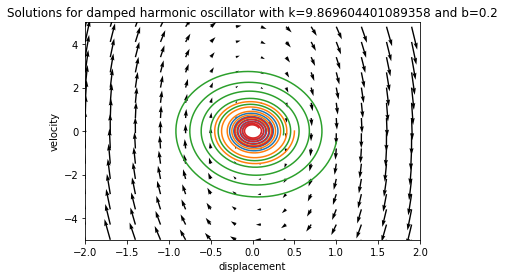

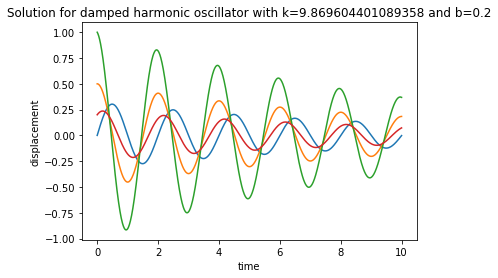

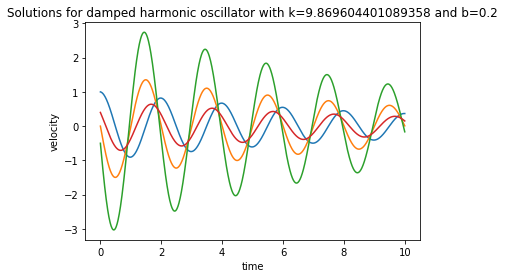

In [7]:
# define the ODE function
def fun(xy,t,k,b):
    newxy = [xy[1], -b*xy[1]-k*xy[0]]
    return newxy


# Set spring constant and damping
k =np.pi**2
b =0.2

# 1. Calculate the eigenvalues of the ODE:

Matrix = np.array([[0, 1],[-k, -b] ])
evals, evecs = np.linalg.eig(Matrix)
print(evals)

# 2. Make phase plane plot
xmin = -2 #change the parameters here to control the range of the axes
xmax = 2
ymin = -5
ymax = 5
dx = 0.3 #set the size of the x-step on the grid
dy = 0.7 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x, y = np.meshgrid(X, Y);  #create a grid

dx = y
dy = -k*x-b*y

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dx, dy)
plt.xlim(xmin,xmax)
plt.ylim(ymin, ymax)
plt.xlabel('displacement') #use more informative labels for a real model
plt.ylabel('velocity')
plt.title('Solutions for damped harmonic oscillator with k='+str(k)+' and b='+str(b))

# Set up arrays of initial values
Xinit = [0, 0.5, 1, 0.2]
Yinit = [1, 0, -0.5,0.4]

# Set time vector
Tmax = 10
dt = 0.01
numsteps = Tmax/dt + 1
t = np.linspace(0, Tmax, numsteps) # create time vector

for j in range(4):
    # Set different initial values, the vector of times, and call the ODE solver again
    init = [Xinit[j], Yinit[j]] #[intial x, initial y]
    sol = odeint(fun, init, t, args=(k,b)) # calculate numeric solution of ODE defined in fun

    # Plot the solution...
    plt.figure(1)
    plt.plot(sol[:,0], sol[:,1])    
    
    plt.figure(2)
    plt.plot(t, sol[:,0])

    plt.figure(3)
    plt.plot(t, sol[:,1])

    
plt.figure(2)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('Solution for damped harmonic oscillator with k='+str(k)+' and b='+str(b))


plt.figure(3)
plt.xlabel('time')
plt.ylabel('velocity')
plt.title('Solutions for damped harmonic oscillator with k='+str(k)+' and b='+str(b))
plt.show()

1. The eigevalues are complex with a negative real part and the imaginary part slighly smaller than pi thus the solutions will be oscillations with a decaying amplitude.
2. The phase portrait confirms this prediction.
3. The period of all four trajectories is slighly longer than 1, thus damping slows down the oscillations in addition to diminisging the amplitude.

**Q2.2:** Set $k = \pi^2$ and choose a value of b so that the oscillator is  *overdamped*. 

[-1.95714693 -5.04285307]


/Users/dkon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


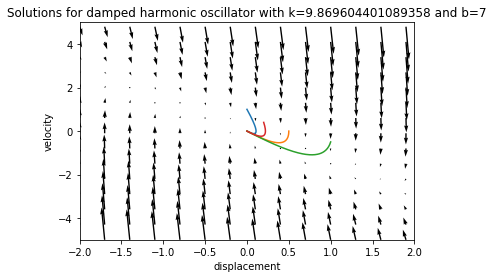

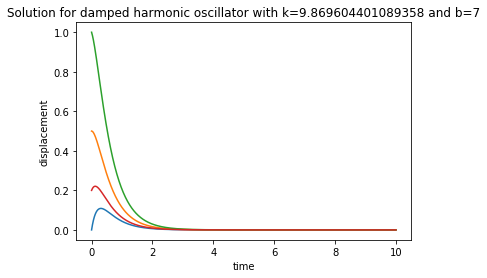

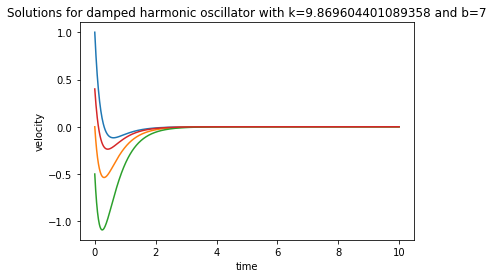

In [8]:
# Set parameter values
k =np.pi**2
b = 7

# 1. Calculate the eigenvalues of the ODE:

Matrix = np.array([[0, 1],[-k, -b] ])
evals, evecs = np.linalg.eig(Matrix)
print(evals)

# 2. Make phase plane plot
xmin = -2 #change the parameters here to control the range of the axes
xmax = 2
ymin = -5
ymax = 5
dx = 0.3 #set the size of the x-step on the grid
dy = 0.7 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x, y = np.meshgrid(X, Y);  #create a grid

dx = y
dy = -k*x-b*y

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dx, dy)
plt.xlim(xmin,xmax)
plt.ylim(ymin, ymax)
plt.xlabel('displacement') #use more informative labels for a real model
plt.ylabel('velocity')
plt.title('Solutions for damped harmonic oscillator with k='+str(k)+' and b='+str(b))

# Set up arrays of initial values
Xinit = [0, 0.5, 1, 0.2]
Yinit = [1, 0, -0.5,0.4]

# Set time vector
Tmax = 10
dt = 0.01
numsteps = Tmax/dt + 1
t = np.linspace(0, Tmax, numsteps) # create time vector

for j in range(4):
    # Set different initial values, the vector of times, and call the ODE solver again
    init = [Xinit[j], Yinit[j]] #[intial x, initial y]
    sol = odeint(fun, init, t, args=(k,b)) # calculate numeric solution of ODE defined in fun

    # Plot the solution...
    plt.figure(1)
    plt.plot(sol[:,0], sol[:,1])    
    
    plt.figure(2)
    plt.plot(t, sol[:,0])

    plt.figure(3)
    plt.plot(t, sol[:,1])

    
plt.figure(2)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('Solution for damped harmonic oscillator with k='+str(k)+' and b='+str(b))


plt.figure(3)
plt.xlabel('time')
plt.ylabel('velocity')
plt.title('Solutions for damped harmonic oscillator with k='+str(k)+' and b='+str(b))
plt.show()

1. The eigevalues are  negative and real thus the solutions will be decaying exponential.
2. The phase portrait confirms this prediction.
3. There is no period since there is no oscillations

**Q2.3:** Set $k = \pi^2$ and choose a value of b so that the oscillator is *critically damped*. 

[-3.14159265 -3.14159265]


/Users/dkon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


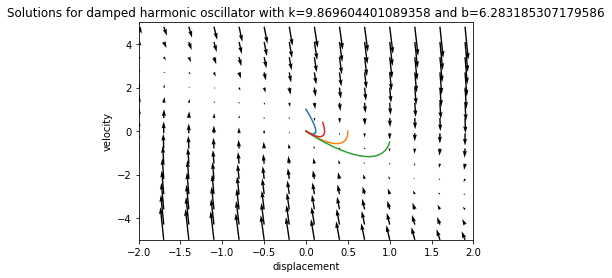

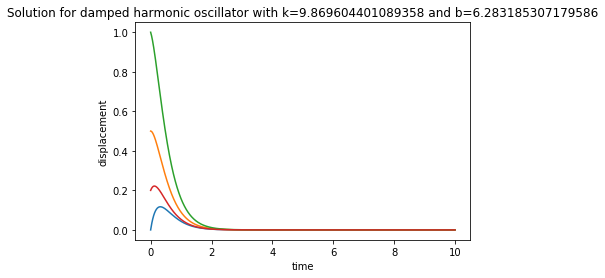

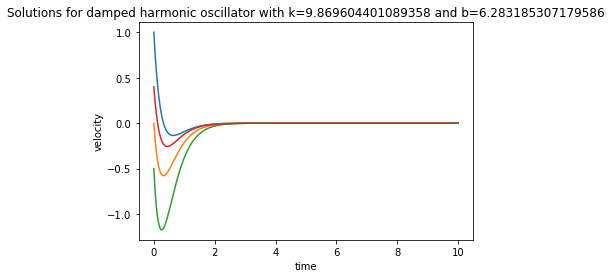

In [9]:
# Set parameter values
k =np.pi**2
b = 2*np.pi

# 1. Calculate the eigenvalues of the ODE:

Matrix = np.array([[0, 1],[-k, -b] ])
evals, evecs = np.linalg.eig(Matrix)
print(evals)

# 2. Make phase plane plot
xmin = -2 #change the parameters here to control the range of the axes
xmax = 2
ymin = -5
ymax = 5
dx = 0.3 #set the size of the x-step on the grid
dy = 0.7 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x, y = np.meshgrid(X, Y);  #create a grid

dx = y
dy = -k*x-b*y

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dx, dy)
plt.xlim(xmin,xmax)
plt.ylim(ymin, ymax)
plt.xlabel('displacement') #use more informative labels for a real model
plt.ylabel('velocity')
plt.title('Solutions for damped harmonic oscillator with k='+str(k)+' and b='+str(b))

# Set up arrays of initial values
Xinit = [0, 0.5, 1, 0.2]
Yinit = [1, 0, -0.5,0.4]

# Set time vector
Tmax = 10
dt = 0.01
numsteps = Tmax/dt + 1
t = np.linspace(0, Tmax, numsteps) # create time vector

for j in range(4):
    # Set different initial values, the vector of times, and call the ODE solver again
    init = [Xinit[j], Yinit[j]] #[intial x, initial y]
    sol = odeint(fun, init, t, args=(k,b)) # calculate numeric solution of ODE defined in fun

    # Plot the solution...
    plt.figure(1)
    plt.plot(sol[:,0], sol[:,1])    
    
    plt.figure(2)
    plt.plot(t, sol[:,0])

    plt.figure(3)
    plt.plot(t, sol[:,1])

    
plt.figure(2)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('Solution for damped harmonic oscillator with k='+str(k)+' and b='+str(b))


plt.figure(3)
plt.xlabel('time')
plt.ylabel('velocity')
plt.title('Solutions for damped harmonic oscillator with k='+str(k)+' and b='+str(b))
plt.show()

Both eigenvalues are equal to -pi, so this is a degenerate node. Solutions decay to 0.

**Q2.4:** Set $k = 4* \pi^2$ and choose a value of b so that the oscillator is *underdamped*. 

[-0.1+6.28238948j -0.1-6.28238948j]


/Users/dkon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


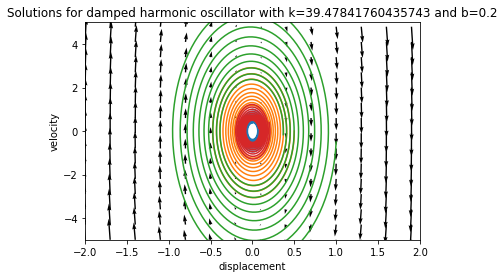

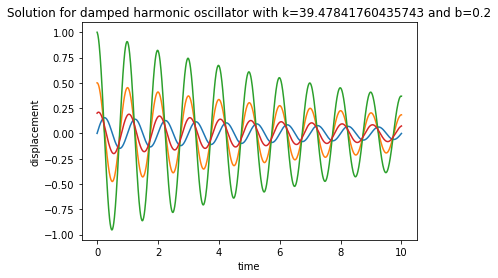

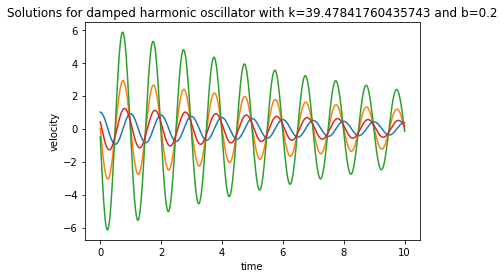

In [10]:
# Set parameter values
k =4*np.pi**2
b =0.2

# 1. Calculate the eigenvalues of the ODE:

Matrix = np.array([[0, 1],[-k, -b] ])
evals, evecs = np.linalg.eig(Matrix)
print(evals)

# 2. Make phase plane plot
xmin = -2 #change the parameters here to control the range of the axes
xmax = 2
ymin = -5
ymax = 5
dx = 0.3 #set the size of the x-step on the grid
dy = 0.7 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x, y = np.meshgrid(X, Y);  #create a grid

dx = y
dy = -k*x-b*y

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dx, dy)
plt.xlim(xmin,xmax)
plt.ylim(ymin, ymax)
plt.xlabel('displacement') #use more informative labels for a real model
plt.ylabel('velocity')
plt.title('Solutions for damped harmonic oscillator with k='+str(k)+' and b='+str(b))

# Set up arrays of initial values
Xinit = [0, 0.5, 1, 0.2]
Yinit = [1, 0, -0.5,0.4]

# Set time vector
Tmax = 10
dt = 0.01
numsteps = Tmax/dt + 1
t = np.linspace(0, Tmax, numsteps) # create time vector

for j in range(4):
    # Set different initial values, the vector of times, and call the ODE solver again
    init = [Xinit[j], Yinit[j]] #[intial x, initial y]
    sol = odeint(fun, init, t, args=(k,b)) # calculate numeric solution of ODE defined in fun

    # Plot the solution...
    plt.figure(1)
    plt.plot(sol[:,0], sol[:,1])    
    
    plt.figure(2)
    plt.plot(t, sol[:,0])

    plt.figure(3)
    plt.plot(t, sol[:,1])

    
plt.figure(2)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('Solution for damped harmonic oscillator with k='+str(k)+' and b='+str(b))


plt.figure(3)
plt.xlabel('time')
plt.ylabel('velocity')
plt.title('Solutions for damped harmonic oscillator with k='+str(k)+' and b='+str(b))
plt.show()

1. The eigevalues are complex with a negative real part and the imaginary part slighly smaller than 2*pi thus the solutions will be oscillations with a decaying amplitude.
2. The phase portrait confirms this prediction.
3. The period of all four trajectories is slighly longer than 0.5, thus damping slows down the oscillations in addition to diminisging the amplitude.

**Q2.5:** Set $k = 4* pi^2$ and choose a value of b so that the oscillator is  *overdamped*. 

[ -2.22043816 -17.77956184]


/Users/dkon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


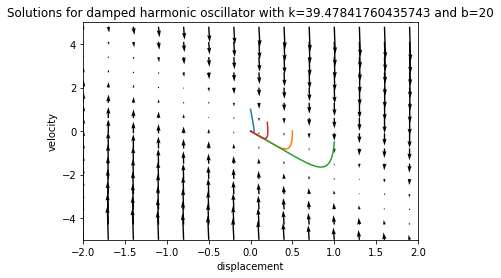

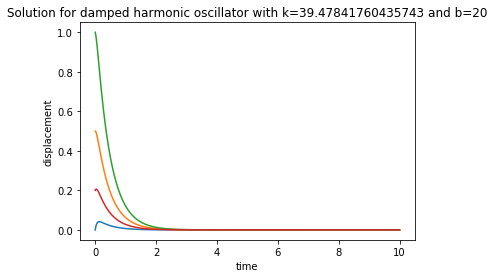

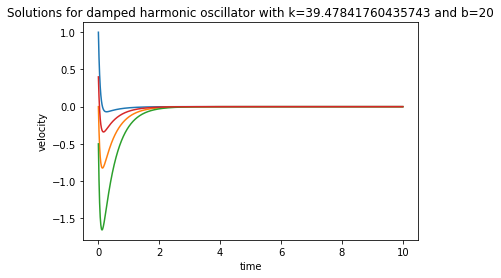

In [11]:
# Set parameter values
k =4*np.pi**2
b = 20

# 1. Calculate the eigenvalues of the ODE:

Matrix = np.array([[0, 1],[-k, -b] ])
evals, evecs = np.linalg.eig(Matrix)
print(evals)

# 2. Make phase plane plot
xmin = -2 #change the parameters here to control the range of the axes
xmax = 2
ymin = -5
ymax = 5
dx = 0.3 #set the size of the x-step on the grid
dy = 0.7 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x, y = np.meshgrid(X, Y);  #create a grid

dx = y
dy = -k*x-b*y

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dx, dy)
plt.xlim(xmin,xmax)
plt.ylim(ymin, ymax)
plt.xlabel('displacement') #use more informative labels for a real model
plt.ylabel('velocity')
plt.title('Solutions for damped harmonic oscillator with k='+str(k)+' and b='+str(b))

# Set up arrays of initial values
Xinit = [0, 0.5, 1, 0.2]
Yinit = [1, 0, -0.5,0.4]

# Set time vector
Tmax = 10
dt = 0.01
numsteps = Tmax/dt + 1
t = np.linspace(0, Tmax, numsteps) # create time vector

for j in range(4):
    # Set different initial values, the vector of times, and call the ODE solver again
    init = [Xinit[j], Yinit[j]] #[intial x, initial y]
    sol = odeint(fun, init, t, args=(k,b)) # calculate numeric solution of ODE defined in fun

    # Plot the solution...
    plt.figure(1)
    plt.plot(sol[:,0], sol[:,1])    
    
    plt.figure(2)
    plt.plot(t, sol[:,0])

    plt.figure(3)
    plt.plot(t, sol[:,1])

    
plt.figure(2)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('Solution for damped harmonic oscillator with k='+str(k)+' and b='+str(b))


plt.figure(3)
plt.xlabel('time')
plt.ylabel('velocity')
plt.title('Solutions for damped harmonic oscillator with k='+str(k)+' and b='+str(b))
plt.show()

1. The eigevalues are  negative and real thus the solutions will be decaying exponential.
2. The phase portrait confirms this prediction.
3. There is no period since there is no oscillations

**Q2.6:** $k = 4* \pi^2$ and choose a value of b so that the oscillator is critically damped.

[-6.28318531 -6.28318531]


/Users/dkon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


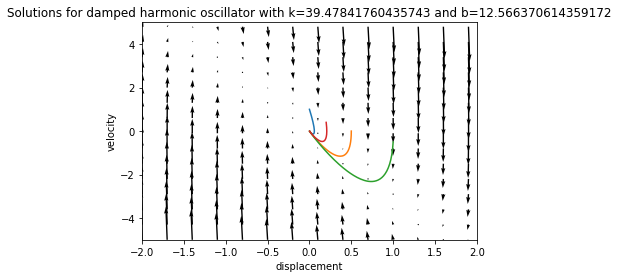

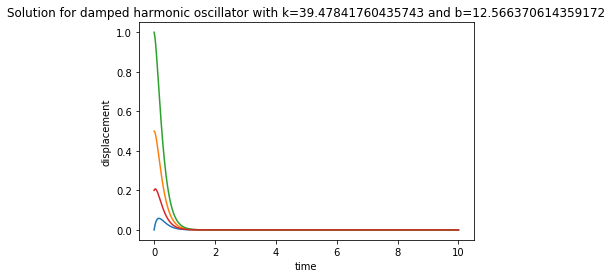

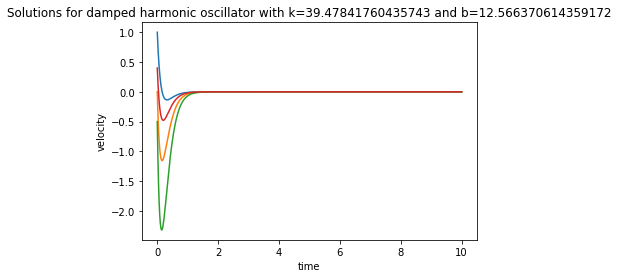

In [12]:
# Set parameter values
k =4*np.pi**2
b = 4*np.pi

# 1. Calculate the eigenvalues of the ODE:

Matrix = np.array([[0, 1],[-k, -b] ])
evals, evecs = np.linalg.eig(Matrix)
print(evals)

# 2. Make phase plane plot
xmin = -2 #change the parameters here to control the range of the axes
xmax = 2
ymin = -5
ymax = 5
dx = 0.3 #set the size of the x-step on the grid
dy = 0.7 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx)
Y = np.arange(ymin, ymax, dy)
x, y = np.meshgrid(X, Y);  #create a grid

dx = y
dy = -k*x-b*y

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
q = ax.quiver(x, y, dx, dy)
plt.xlim(xmin,xmax)
plt.ylim(ymin, ymax)
plt.xlabel('displacement') #use more informative labels for a real model
plt.ylabel('velocity')
plt.title('Solutions for damped harmonic oscillator with k='+str(k)+' and b='+str(b))

# Set up arrays of initial values
Xinit = [0, 0.5, 1, 0.2]
Yinit = [1, 0, -0.5,0.4]

# Set time vector
Tmax = 10
dt = 0.01
numsteps = Tmax/dt + 1
t = np.linspace(0, Tmax, numsteps) # create time vector

for j in range(4):
    # Set different initial values, the vector of times, and call the ODE solver again
    init = [Xinit[j], Yinit[j]] #[intial x, initial y]
    sol = odeint(fun, init, t, args=(k,b)) # calculate numeric solution of ODE defined in fun

    # Plot the solution...
    plt.figure(1)
    plt.plot(sol[:,0], sol[:,1])    
    
    plt.figure(2)
    plt.plot(t, sol[:,0])

    plt.figure(3)
    plt.plot(t, sol[:,1])

    
plt.figure(2)
plt.xlabel('time')
plt.ylabel('displacement')
plt.title('Solution for damped harmonic oscillator with k='+str(k)+' and b='+str(b))


plt.figure(3)
plt.xlabel('time')
plt.ylabel('velocity')
plt.title('Solutions for damped harmonic oscillator with k='+str(k)+' and b='+str(b))
plt.show()

Both eigenvalues are equal to -2*pi, so this is a degenerate node. Solutions decay to 0.

### Rubric:

**Part 1:** 
3 pts per question: eigenvalues, phase plane, time plot

**Part 2:** 
3 pts per question: eigenvalues, phase plane, time plot

**Total: 30 pts**
